<h1>Fashion-MNIST with PyTorch </h1>

<p>In this project, we will classify  Fashion-MNIST dataset using convolutional neural networks in PyTorch.</p>


### Data Loading

Here we are gonna to download the datasets and PyTorch modules that we are going to need.

In [1]:
!pip install torch
!pip install torchvision

In [2]:

from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# For the same results everytime we need to run this code
torch.manual_seed(0)

Import Non-PyTorch Modules 

In [3]:
# Other non-PyTorch Modules

from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

from PIL import Image

#### Creating a Dataset Class

We will load a Dataset object, but first we must transform the dataset. We are goig to use the <code>Compose</code> function to perform the following transforms:. 
<ol>
    <li><code> Resize </code> to resize the image.</li>
    <li><code> ToTensor </code> to convert the image to a tensor.</li>
</ol>


In [4]:
# The focus here is using the PyTorch framework, so for the purpose of this code to run light, let's resize the images to 16x16.
IMAGE_SIZE = 16

# Transforms functions
transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
transforms.ToTensor()#

# Composed function (Works as a pipeline for the transforms)
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

<hr>

Now, let's create two dataset objects for the Fashion MNIST  dataset. One for training data called <code> dataset_train </code> and one for validation data <code>dataset_val</code>.

In [5]:
dataset_train = dsets.FashionMNIST(root= '.fashion/data', train=True, transform=composed,  download=True)

In [6]:
dataset_val = dsets.FashionMNIST(root= '.fashion/data', train=False, transform=composed,  download=True)

In [7]:
# function for plotting
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

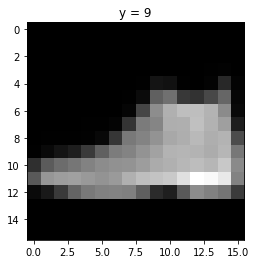

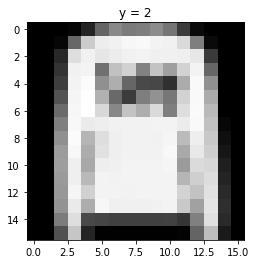

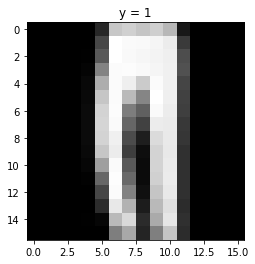

In [8]:
# Let's visualize some data
for n,data_sample in enumerate(dataset_val):

    show_data(data_sample)
    plt.show()
    if n==2:
        break 

## Modelling
Now we are goig to create a Convolutional Neural Network class using the following constructors. We will train the network using them.

Constructor  using Batch Normalization

In [9]:
class CNN_batch(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x=self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x=self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x=self.bn_fc1(x)
        return x

Constructor  for regular Convolutional Neural Network

In [10]:
class CNN(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

train loader  and validation loader 

In [11]:
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100 )
test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100 )

Convolutional Neural Network object 

In [12]:
model = CNN(out_1=16, out_2=32,number_of_classes=10)
model_norm =CNN_batch(out_1=16, out_2=32,number_of_classes=10)

Creating the objects for the criterion and the optimizer. We will use the optimizer SGD with a learning rate of 0.01 and the criterion Cross Entropy Loss.

In [18]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

criterion = nn.CrossEntropyLoss()

optmizer_norm = torch.optim.SGD(model_norm.parameters(), lr = learning_rate)

#### Code used to train the model1 

In [14]:
import time
start_time = time.time()

cost_list=[]
accuracy_list=[]
N_test=len(dataset_val)
n_epochs=5
for epoch in range(n_epochs):
    cost=0
    model.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        cost+=loss.item()
    correct=0
    #perform a prediction on the validation  data 
    model.eval()
    for x_test, y_test in test_loader:
        z = model(x_test)
      
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cost_list.append(cost)
    

#### Evaluation Model 1

We will use the following to plot the Cost and accuracy for each epoch for the training and testing data, respectively. 

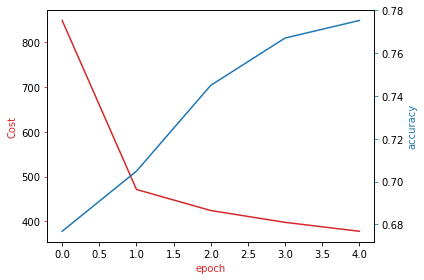

In [15]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

##### Code used to train Model_Norm

In [22]:
import time
start_time = time.time()

# lists taht we are going to use for plotting later
cost_list=[]
accuracy_list=[]

# To calculate the accuracy
N_test=len(dataset_val)

# Number of Epochs
n_epochs=5
for epoch in range(n_epochs):
    cost=0
    model_norm.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model_norm(x)
        loss = criterion(z, y)
        loss.backward()
        optmizer_norm.step()
        cost+=loss.item()
    
    # Performing the prediction on the validation  data 
    correct=0
    model_norm.eval()
    for x_test, y_test in test_loader:
        z = model_norm(x_test)
      
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cost_list.append(cost)
    

##### Evaluation Model Norm

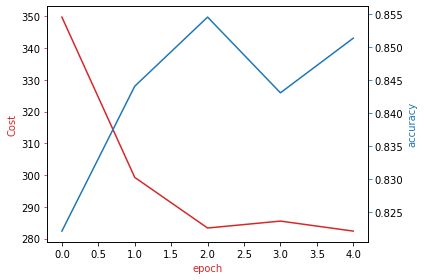

In [23]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

dataset: https://github.com/zalandoresearch/fashion-mnist